# **Background**

For this drill, we will analyze Boston house-price data from 1978.

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from collections import Counter
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

boston = load_boston()
data = boston.data
target = boston.target


In [366]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
print(df)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [367]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [368]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


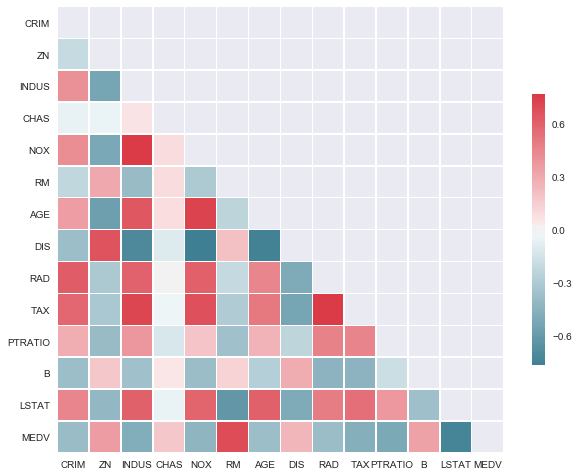

In [369]:
#We can plot the diagonal correlation matrix
corr = df.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

We can see that several of the variables above have strong correlations (dark red). Now let's plot the distribution of median home values.

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


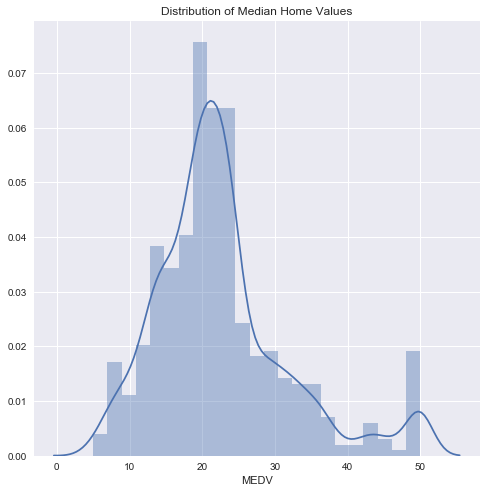

In [370]:
plt.figure(figsize=(8,8))
g = sns.distplot(df['MEDV'])
g.set(xlabel='MEDV', ylabel='', title='Distribution of Median Home Values')
plt.show()

Now let's plot a scatter plot for each of the variables against the target variable (median home values).

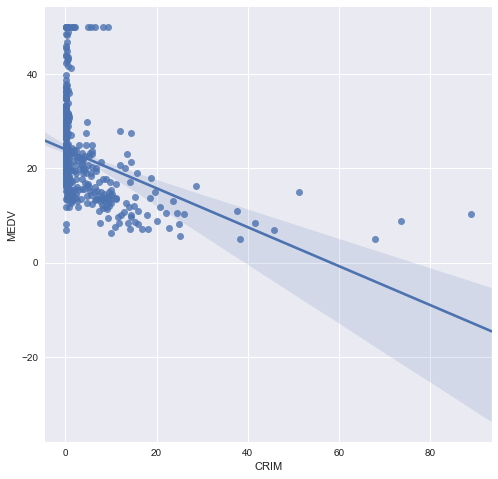

In [371]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['CRIM'], y=df['MEDV'], data=df)
g.set(xlabel='CRIM', ylabel='MEDV', title='')
plt.show()

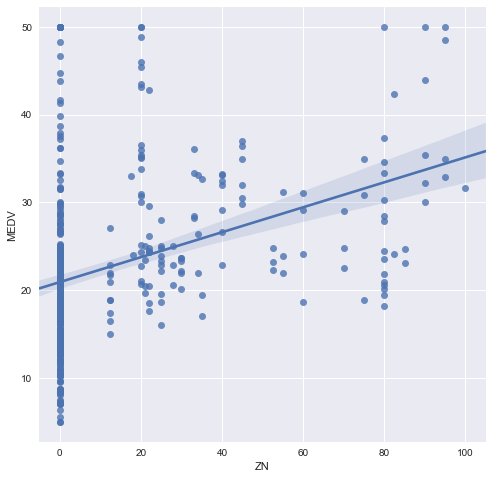

In [372]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['ZN'], y=df['MEDV'], data=df)
g.set(xlabel='ZN', ylabel='MEDV', title='')
plt.show()

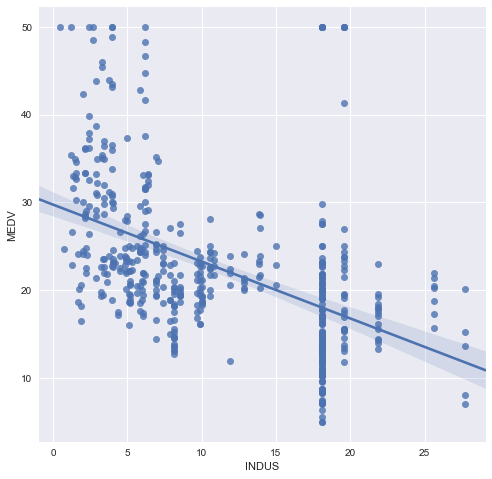

In [373]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['INDUS'], y=df['MEDV'], data=df)
g.set(xlabel='INDUS', ylabel='MEDV', title='')
plt.show()

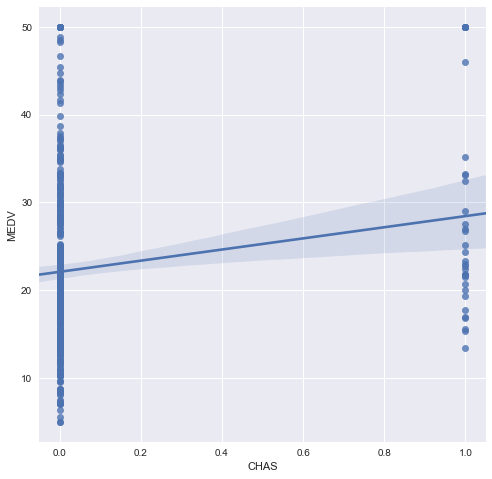

In [374]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['CHAS'], y=df['MEDV'], data=df)
g.set(xlabel='CHAS', ylabel='MEDV', title='')
plt.show()

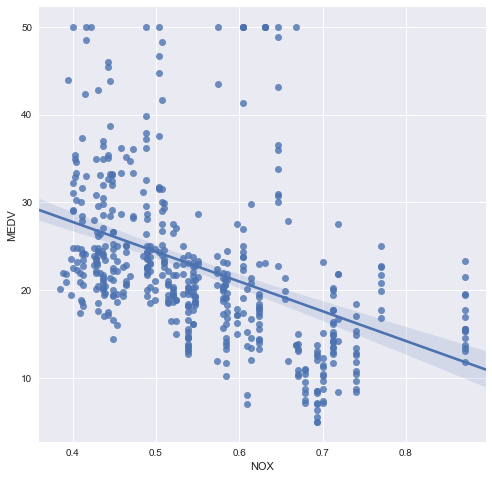

In [375]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['NOX'], y=df['MEDV'], data=df)
g.set(xlabel='NOX', ylabel='MEDV', title='')
plt.show()

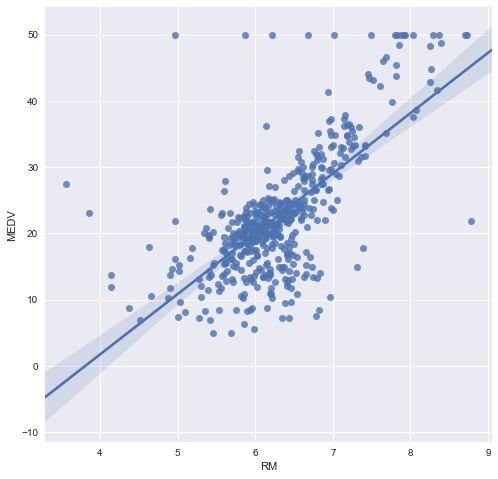

In [376]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['RM'], y=df['MEDV'], data=df)
g.set(xlabel='RM', ylabel='MEDV', title='')
plt.show()

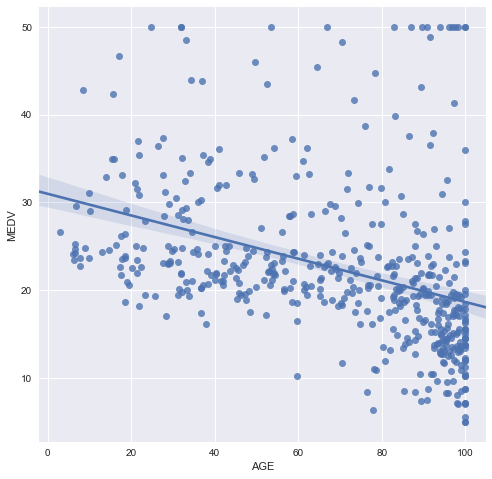

In [377]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['AGE'], y=df['MEDV'], data=df)
g.set(xlabel='AGE', ylabel='MEDV', title='')
plt.show()

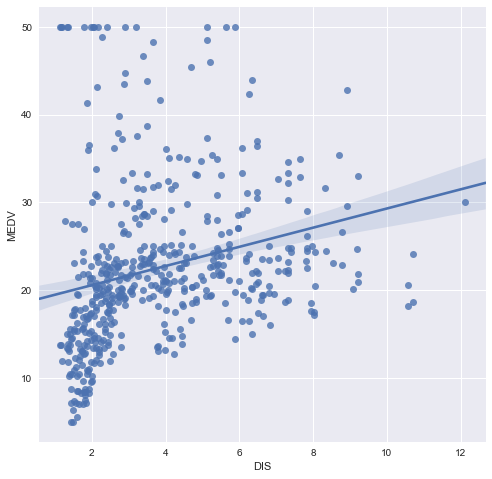

In [378]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['DIS'], y=df['MEDV'], data=df)
g.set(xlabel='DIS', ylabel='MEDV', title='')
plt.show()

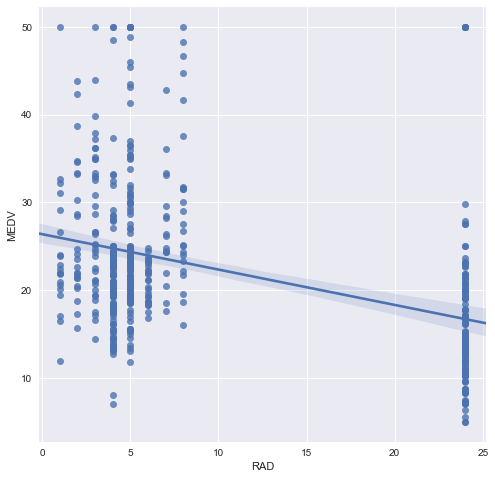

In [379]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['RAD'], y=df['MEDV'], data=df)
g.set(xlabel='RAD', ylabel='MEDV', title='')
plt.show()

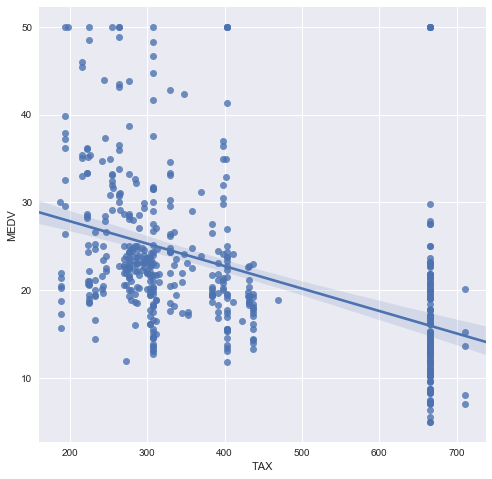

In [380]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['TAX'], y=df['MEDV'], data=df)
g.set(xlabel='TAX', ylabel='MEDV', title='')
plt.show()

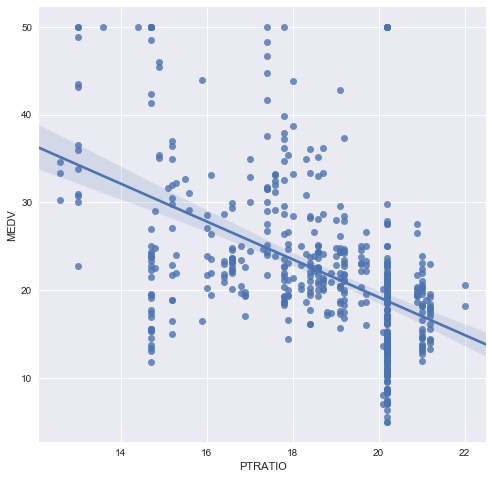

In [381]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['PTRATIO'], y=df['MEDV'], data=df)
g.set(xlabel='PTRATIO', ylabel='MEDV', title='')
plt.show()

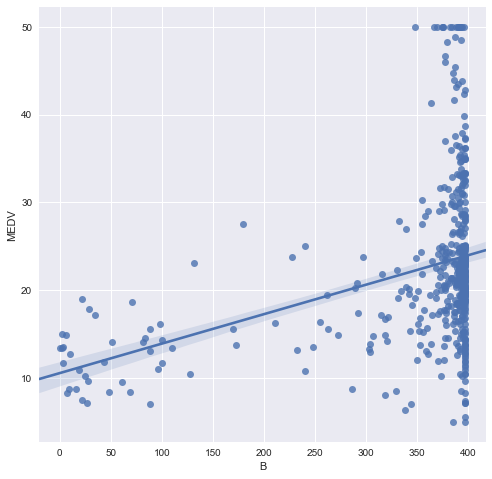

In [382]:
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['B'], y=df['MEDV'], data=df)
g.set(xlabel='B', ylabel='MEDV', title='')
plt.show()

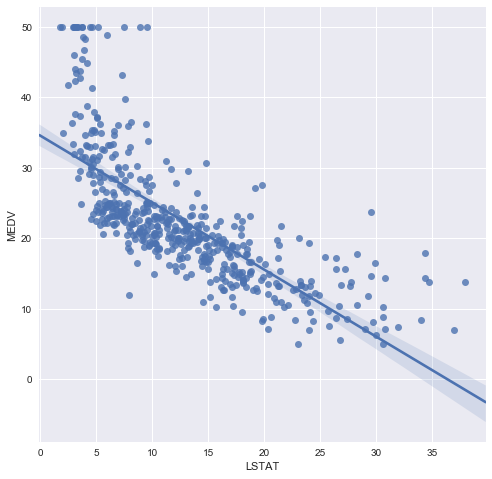

In [383]:
#Now let's plot a scatter plot for each of the variables against the target variable (median home values)
plt.figure(figsize=(8,8))
g = sns.regplot(x=df['LSTAT'], y=df['MEDV'], data=df)
g.set(xlabel='LSTAT', ylabel='MEDV', title='')
plt.show()

The above scatter plots reveal some key insights about this data, highlighted below:

-Lower crime rates are associated with higher median home value

-Higher proportions of non-retail business acres are associated with higher median home value

-More rooms are associated with higher median home value

-With some exceptions, lower pupil-teacher ratios are associated with higher median home value

-The strongest correlation appears to be between MEDV and LSTAT; in other words, a lower % lower
status of the population is strongly associated with higher median home value

My favorite plot is the one showing MEDV vs. PTRATIO. It indicates that lower-income neighborhoods have more students and less teachers. It could also indicate that there are less public schools in higher-income neighborhoods. 

I found the plot of MEDV vs. B interesting. I don't quite understand the formula 1000(Bk-0.63)^2, but from the plot it seems like many homes with high median home prices are associated with a higher proportion of blacks. A better explanation of this formula and how it is derived is probably one thing missing from this dataset's description.

In [384]:
print(df['MEDV'].mean())

22.532806324110698


In [386]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64